In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics

In [0]:
from sklearn import datasets
olive = datasets.fetch_olivetti_faces()

In [0]:
olive.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [0]:
olive['data'].shape , olive['images'].shape

((400, 4096), (400, 64, 64))

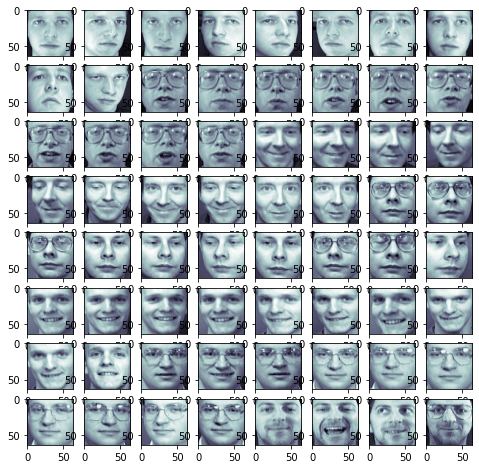

In [0]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax= fig.add_subplot(8,8,i+1)
    ax.imshow(olive.images[i] , cmap=plt.cm.bone)
plt.show()

In [0]:
x = olive.data
y = olive.target

pca = PCA()
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [0]:
print("There are {} images in the dataset".format(len(x)))
print("There are {} unique targets in the dataset".format(len(np.unique(y))))

There are 400 images in the dataset
There are 40 unique targets in the dataset


In [0]:
pca = PCA(n_components = 123 , whiten =True)
transformed_data = pca.fit_transform(x)
transformed_data.shape

(400, 123)

In [0]:
x_approx = pca.inverse_transform(transformed_data)
x_approx.shape

(400, 4096)

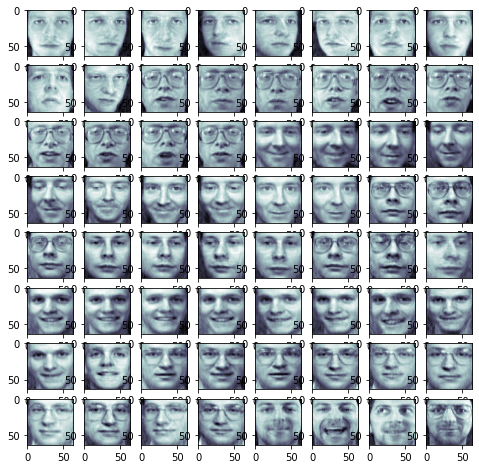

In [0]:
x_approx_img = x_approx.reshape(400,64,64)
fig = plt.figure(figsize = (8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(x_approx_img[i] , cmap = plt.cm.bone)
plt.show()

In [0]:
x_approx_img

array([[[0.31165743, 0.40031657, 0.41456896, ..., 0.39215592,
         0.38122365, 0.37472418],
        [0.33012268, 0.39568362, 0.4160889 , ..., 0.3842157 ,
         0.3627515 , 0.3293957 ],
        [0.34416813, 0.3813621 , 0.4331546 , ..., 0.37072584,
         0.36243793, 0.31087446],
        ...,
        [0.19363096, 0.178806  , 0.21043052, ..., 0.11453003,
         0.16537845, 0.18490446],
        [0.1800443 , 0.17998067, 0.200559  , ..., 0.11077078,
         0.1523539 , 0.19091219],
        [0.1722441 , 0.20575361, 0.21221003, ..., 0.16140124,
         0.14473078, 0.18013209]],

       [[0.51018876, 0.4781283 , 0.46960065, ..., 0.21123882,
         0.2254596 , 0.27991152],
        [0.48212773, 0.47910804, 0.49909902, ..., 0.1987301 ,
         0.19947898, 0.24790204],
        [0.5078944 , 0.50316143, 0.53152704, ..., 0.18666212,
         0.18460767, 0.23129249],
        ...,
        [0.7965938 , 0.7917883 , 0.7983322 , ..., 0.16435441,
         0.1545705 , 0.08595665],
        [0.8

In [0]:
X_train, X_test, Y_train, Y_test=train_test_split(x, y, test_size=0.3, stratify=y, random_state=0)
print("x_train shape:",X_train.shape)
print("Y_train shape:{}".format(Y_train.shape))

x_train shape: (280, 4096)
Y_train shape:(280,)


**PCA Projection of Defined Number of Target**

In [0]:
pca=PCA(n_components=2)
pca.fit(x)
X_pca=pca.transform(x)

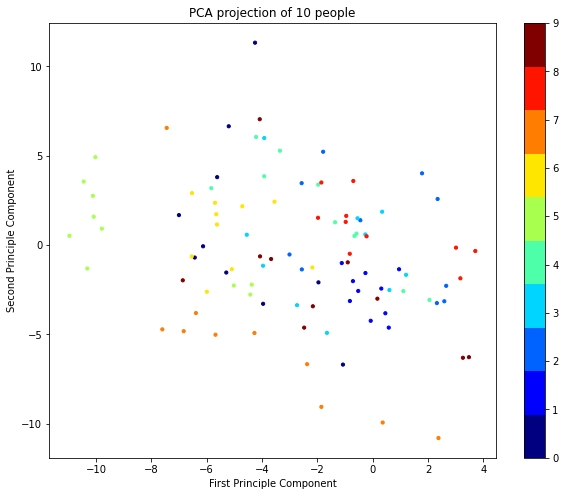

In [0]:
number_of_people=10
index_range=number_of_people*10
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(1,1,1)
scatter=ax.scatter(X_pca[:index_range,0],
            X_pca[:index_range,1], 
            c=y[:index_range],
            s=10,
           cmap=plt.get_cmap('jet', number_of_people)
          )

ax.set_xlabel("First Principle Component")
ax.set_ylabel("Second Principle Component")
ax.set_title("PCA projection of {} people".format(number_of_people))

fig.colorbar(scatter)

**Finding Optimum Number of Principal Component**

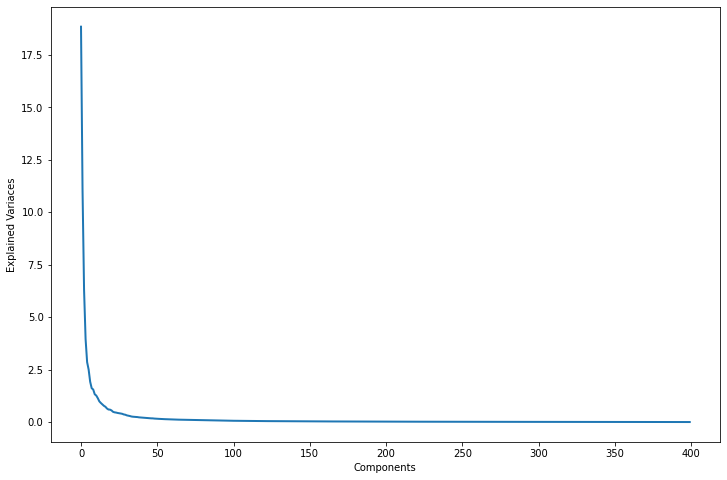

In [0]:
pca=PCA()
pca.fit(x)

plt.figure(1, figsize=(12,8))

plt.plot(pca.explained_variance_, linewidth=2)
 
plt.xlabel('Components')
plt.ylabel('Explained Variaces')
plt.show()

In [0]:
pca=PCA(n_components=90, whiten=True)       # More than 90 PCA components represent the same data
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=90, random_state=None,
    svd_solver='auto', tol=0.0, whiten=True)

**Classification Results**

In [0]:
X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)

In [0]:
clf = SVC()
clf.fit(X_train_pca, Y_train)
y_pred = clf.predict(X_test_pca)
print("accuracy score:{:.2f}".format(metrics.accuracy_score(Y_test, y_pred)))

accuracy score:0.92


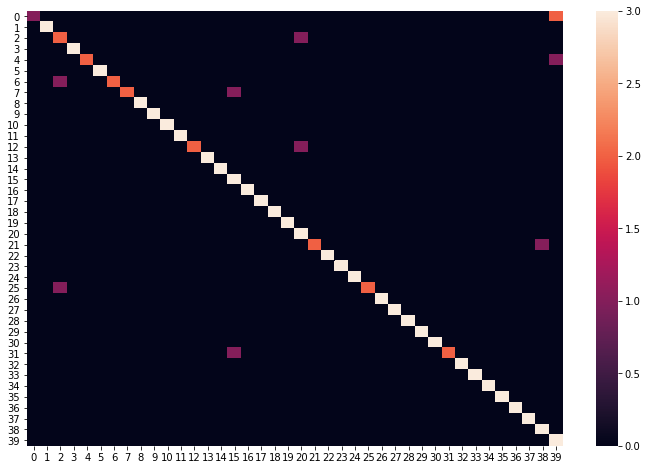

In [0]:
import seaborn as sns
plt.figure(1, figsize=(12,8))
sns.heatmap(metrics.confusion_matrix(Y_test, y_pred))

In [0]:
print(metrics.classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       1.00      1.00      1.00         3
           2       0.50      0.67      0.57         3
           3       1.00      1.00      1.00         3
           4       1.00      0.67      0.80         3
           5       1.00      1.00      1.00         3
           6       1.00      0.67      0.80         3
           7       1.00      0.67      0.80         3
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       1.00      0.67      0.80         3
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       0.60      1.00      0.75         3
          16       1.00      1.00      1.00         3
          17       1.00    

**Comparing Accuracy With Other Algorithms**

In [0]:
models = []
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(("LR",LogisticRegression()))
models.append(("NB",GaussianNB()))
models.append(("KNN",KNeighborsClassifier(n_neighbors=5)))
models.append(("DT",DecisionTreeClassifier()))
models.append(("SVM",SVC()))

for name, model in models:
    
    clf=model

    clf.fit(X_train_pca, Y_train)

    y_pred=clf.predict(X_test_pca)
    print("{} Result:".format(name).upper())
    print("Accuracy score:{:0.2f}".format(metrics.accuracy_score(Y_test, y_pred)))
    print()

LDA RESULT:
Accuracy score:0.93

LR RESULT:
Accuracy score:0.93

NB RESULT:
Accuracy score:0.86

KNN RESULT:
Accuracy score:0.71

DT RESULT:
Accuracy score:0.65

SVM RESULT:
Accuracy score:0.92

